# Goal
Can we replace Triqlers qvality module and "score" input to FDR input.

1) Aggregate PSM-level PEP to Q-value
2) Aggregate PEP-level PEP to Q-value
3) Take PSM-level Q-value
4) Take Peptide-level Q-value
5) Use -log10(Q-value) as score (PSM-level)
6) Use -log10(Q-value) as score (Peptide-level)

Do we need to do the same with the target-decoy FDR


Run triqler with 1-6 and check if results differ and explain the differing results. 

Make some plots and send to Lukas.

1) q-value vs q-value from pep plot
2) some more rankign plots

Conclusion... this data looks too funky... there is no relationship between pep and q-value


In [22]:
import pandas as pd
import seaborn as sns
import os

In [3]:
os.chdir("/home/ptruong/git/PEP/data/UniProt")

In [30]:
#df = pd.read_csv("concatenated_ALL_extra_PSM_full_export", sep = ",")
df = pd.read_csv("concatenated_ALL_extra_Peptide_full_export", sep = ",")

In [31]:
df.columns

Index(['PSMId', 'SpectrumTitle', 'SpectrumFilename', 'Proteins', 'Position',
       'Sequence', 'SequenceWithMods', 'measured_mz', 'measured_rt',
       'peptide_type', 'Decoy', 'predicted_rt', 'engine_score', 'rt_apex',
       'mz_error', 'pep', 'delta_pep', 'ion_fraction', 'peptide_length',
       'charge_2', 'charge_3', 'charge_4', 'isotope_0', 'isotope_1',
       'isotope_2', 'isotope_3', 'isotope_4', 'unspecific', 'enzymatic_N',
       'enzymatic_C', 'enzymatic', 'rt_apex_dist', 'rt_Abs_error',
       'rt_Square_error', 'rt_Log_error', 'matched_peaks', 'spectra_log',
       'spectra_cos_similarity', 'spectra_angular_similarity',
       'spectra_cross_entropy', 'b_ion_coverage', 'b_ion_matched_peaks',
       'b_ion_spectra_log', 'b_ion_spectra_cos_similarity',
       'b_ion_spectra_angular_similarity', 'b_ion_spectra_cross_entropy',
       'y_ion_coverage', 'y_ion_matched_peaks', 'y_ion_spectra_log',
       'y_ion_spectra_cos_similarity', 'y_ion_spectra_angular_similarity',
       

In [34]:
# Calculate q-value from PEP
def pep_to_qvalue(df, pep = "pep", qval_col = "qval_from_pep"):
    df = df.sort_values(by = pep)
    PEP = df[pep].reset_index().drop("index", axis = 1).reset_index()
    PEP_sum = PEP.cumsum()
    qval = PEP_sum[pep] / (PEP_sum.index+1)
    df[qval_col] = qval
    return df

In [50]:
def target_decoy_fdr(df, score):
    df.sort_values(score, ascending = False, inplace = True) #high score => higher certainty
    df["decoy_hit"] = (df["Decoy"]==-1)
    df["target_hit"] = ~(df["Decoy"]==-1)
    df["decoy_cumsum"] = df.decoy_hit.cumsum()
    df["target_cumsum"] = df.target_hit.cumsum()

    df["fdrTargetDecoy"] = df["decoy_cumsum"]/df["target_cumsum"] #Entrapment FDR 
    return df


In [35]:
df = pep_to_qvalue(df, "pep")
df = target_decoy_fdr(df)

In [63]:
df.columns

Index(['PSMId', 'SpectrumTitle', 'SpectrumFilename', 'Proteins', 'Position',
       'Sequence', 'SequenceWithMods', 'measured_mz', 'measured_rt',
       'peptide_type', 'Decoy', 'predicted_rt', 'engine_score', 'rt_apex',
       'mz_error', 'pep', 'delta_pep', 'ion_fraction', 'peptide_length',
       'charge_2', 'charge_3', 'charge_4', 'isotope_0', 'isotope_1',
       'isotope_2', 'isotope_3', 'isotope_4', 'unspecific', 'enzymatic_N',
       'enzymatic_C', 'enzymatic', 'rt_apex_dist', 'rt_Abs_error',
       'rt_Square_error', 'rt_Log_error', 'matched_peaks', 'spectra_log',
       'spectra_cos_similarity', 'spectra_angular_similarity',
       'spectra_cross_entropy', 'b_ion_coverage', 'b_ion_matched_peaks',
       'b_ion_spectra_log', 'b_ion_spectra_cos_similarity',
       'b_ion_spectra_angular_similarity', 'b_ion_spectra_cross_entropy',
       'y_ion_coverage', 'y_ion_matched_peaks', 'y_ion_spectra_log',
       'y_ion_spectra_cos_similarity', 'y_ion_spectra_angular_similarity',
       

In [66]:
df[["engine_score", "q-value"]].sort_values("engine_score")

,engine_score,q-value
837001,1.000000e-15,0.000249
584659,1.000000e-15,0.000257
902808,1.000000e-15,0.000246
531771,1.000000e-15,0.000257
87172,1.000000e-15,0.000246
...,...,...
599010,1.700000e+04,0.251334
616624,2.200000e+04,0.512970
304006,2.400000e+04,0.508485
228633,2.900000e+04,0.509402


<AxesSubplot:xlabel='pep', ylabel='q-value'>

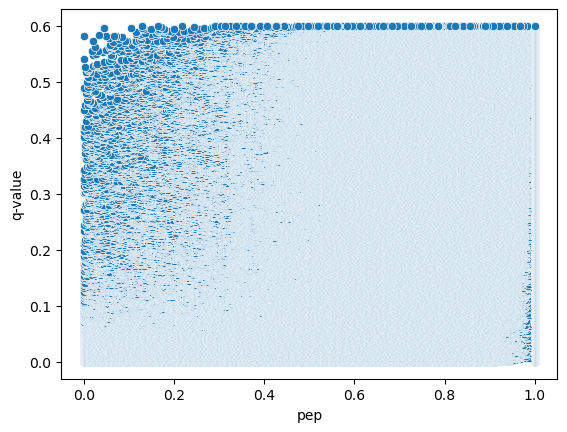

In [70]:
sns.scatterplot(x = "pep", y="q-value", data = df)

<AxesSubplot:xlabel='score', ylabel='q-value'>

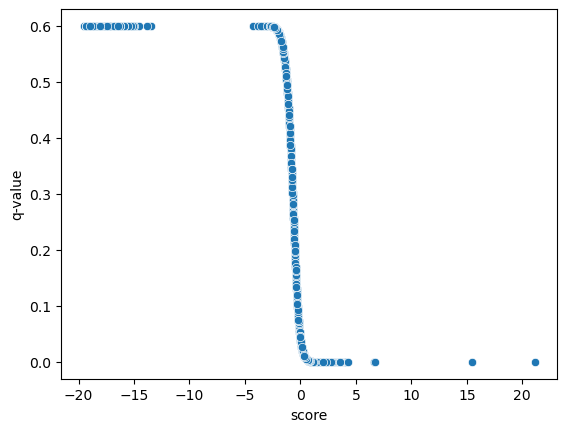

In [28]:
sns.scatterplot(x = "score", y="q-value", data = df)

<AxesSubplot:xlabel='score', ylabel='qval_from_pep'>

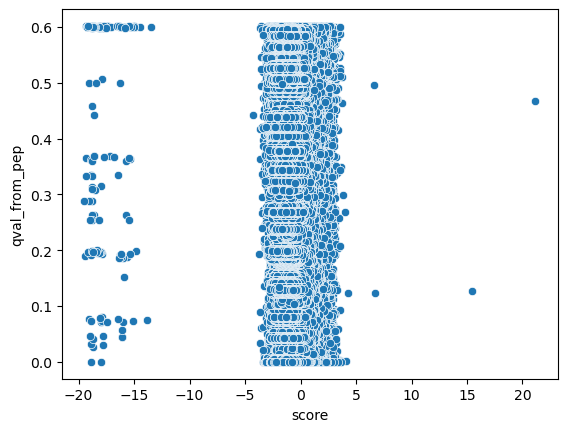

In [29]:
sns.scatterplot(x = "score", y="qval_from_pep", data = df)

In [26]:
df[["score","q-value"]]

,score,q-value
299929,1.135030,0.000476
170192,1.714450,0.000246
670724,0.975706,0.000861
170195,1.128860,0.000487
170196,1.471690,0.000249
...,...,...
275012,-1.314230,0.516662
275011,-1.723520,0.573116
275010,-1.218180,0.494870
275029,-1.283300,0.510007
